<a href="https://colab.research.google.com/github/abdulxs/Pattern-Recognition/blob/main/PR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Visualize the distribution of the final grades. Visualize the connection between exercises
done and points earned in the exam. What conclusions could be drawn from these plots?

In [4]:
data = np.genfromtxt('bogus_student_data.txt', delimiter=' ', names=True, dtype=None)
grades = data['grades']
exercise_points = data['exercise_points']
exam_points = data['exam_points']

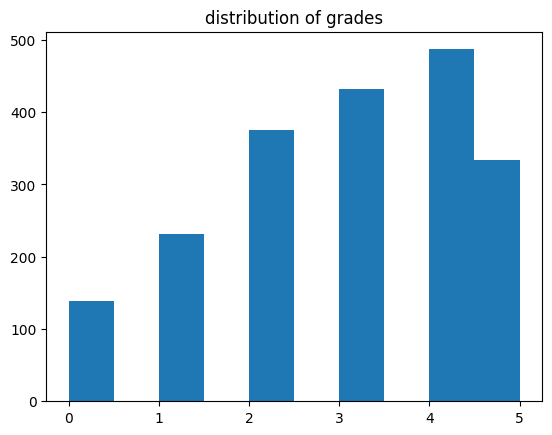

In [5]:
plt.hist(grades)
plt.title('distribution of grades')
plt.show()

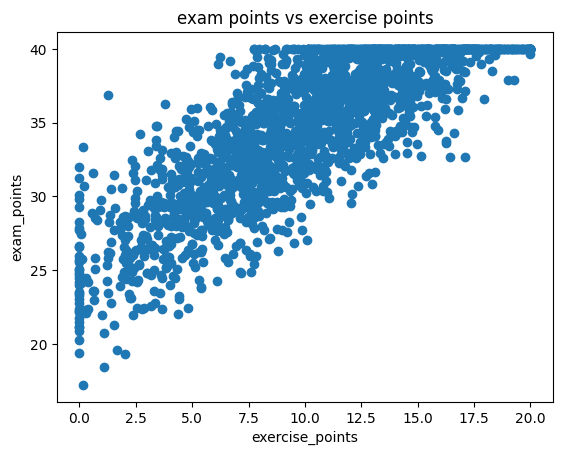

In [6]:
plt.scatter(exercise_points, exam_points)
plt.xlabel('exercise_points')
plt.ylabel('exam_points')
plt.title('exam points vs exercise points')
plt.show()

Analysis
From the plots


We can deduce that there is a linear correlation between the exercise points and the points earned in the exam. Also, the distribution of students that scored higher grades seems to progressively increase between grades 1 and 4 but there's an apparent slight drop off for grade 5.

Compute the mean and standard deviation (std) of exercise points over all observations.
Then compute mean and std. per grade (i.e. one mean/std for students who gained grade 0,
one for students who gained 1, etc.)

In [20]:
# Compute mean and standard deviation of exercise points over all observations
exercise_mean_all = np.mean(exercise_points)
exercise_std_all = np.std(exercise_points)

print("Mean of exercise points over all observations:", exercise_mean_all)
print("Standard deviation of exercise points over all observations:", exercise_std_all)

Mean of exercise points over all observations: 10.10813
Standard deviation of exercise points over all observations: 4.659659580173212


In [21]:
# Compute mean and standard deviation per grade
for grade in range(6):
    mask = (grades == grade)
    exercise_mean_grade = np.mean(exercise_points[mask])
    exercise_std_grade = np.std(exercise_points[mask])
    print(f"\nGrade {grade}:")
    print("Mean of exercise points:", exercise_mean_grade)
    print("Standard deviation of exercise points:", exercise_std_grade)



Grade 0:
Mean of exercise points: 1.8310791366906474
Standard deviation of exercise points: 1.51760208936699

Grade 1:
Mean of exercise points: 4.599181034482759
Standard deviation of exercise points: 1.7097503654200816

Grade 2:
Mean of exercise points: 7.3363297872340425
Standard deviation of exercise points: 1.5564404075659979

Grade 3:
Mean of exercise points: 10.006388888888889
Standard deviation of exercise points: 1.6470519164349673

Grade 4:
Mean of exercise points: 12.685030800821357
Standard deviation of exercise points: 1.6404048522037007

Grade 5:
Mean of exercise points: 16.87395209580838
Standard deviation of exercise points: 1.7757170966361806


By looking at the amount of exercise done, we can predict the grades the students get.
From the observed data, we can predict that a student will get a 5 grade if he gets at least 16 exercise points.
We can also predict that a student will get a grade 4 if he scores at least 12 exercise points.

In [28]:
# Predicting grades based on exercise points alone
def predict_grade(exercise_points):
    if exercise_points >= 16:
        return 5
    elif exercise_points >= 12:
        return 4
    elif exercise_points >= 10:
        return 3
    elif exercise_points >= 7:
        return 2
    elif exercise_points >= 4:
        return 1
    else:
        return 0

exercise_points_to_predict = [16, 12]
for points in exercise_points_to_predict:
    predicted_grade = predict_grade(points)
    print(f"Exercise Points: {points}, Predicted Grade: {predicted_grade}")

Exercise Points: 16, Predicted Grade: 5
Exercise Points: 12, Predicted Grade: 4


2.

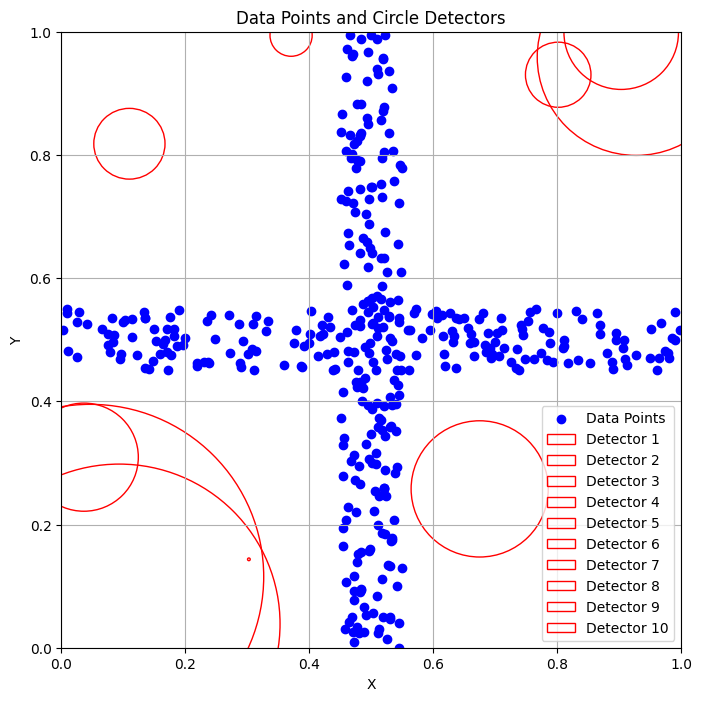

In [29]:

# Load the data from Normal_Data.txt
data = np.genfromtxt('Normal_Data.txt', delimiter=',')
data = data.T

# Define the number of detectors
NUM_DETECTOR = 10

# Function to check if a circle detector overlaps with any data points
def is_overlapping(center, radius, data_points):
    for point in data_points:
        if np.linalg.norm(point - center) < radius:
            return True
    return False

detectors = []

# Generate detectors
while len(detectors) < NUM_DETECTOR:
    # Generate random center and radius for the circle detector
    center = np.random.rand(2)  # Random center within the data range (0 to 1)
    radius = np.random.rand()

    # Check if the detector overlaps with any data points
    if not is_overlapping(center, radius, data):
        detectors.append((center, radius))

# Visualize the data points and detectors
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')

for i, detector in enumerate(detectors):
    center, radius = detector
    circle = plt.Circle(center, radius, color='red', fill=False, label=f'Detector {i+1}')
    plt.gca().add_patch(circle)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points and Circle Detectors')
plt.legend()
plt.grid(True)
plt.show()
